W0317 14:08:38 4852 minpy.dispatch.registry:register:46] Type MXNet for name reshape has already existed


开始进行遗传算法
0 Best Fitness rate: 1668710624.0
 Average Fitness rate :1829805536.0
 worst Fitness rate:1932026784.0


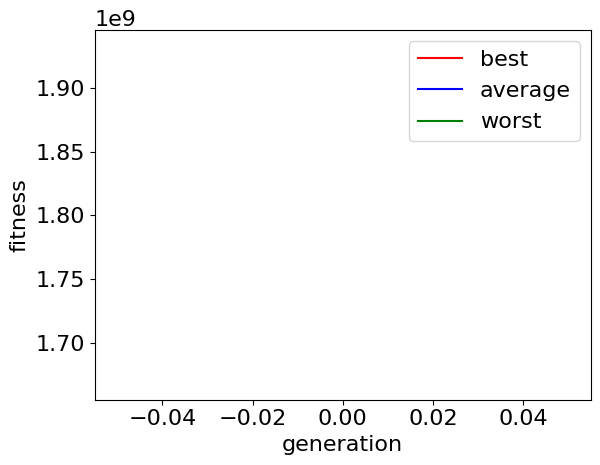

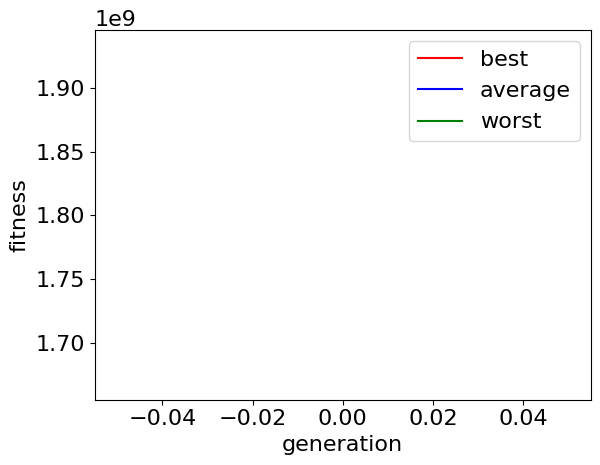

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100 Best Fitness rate: 785566192.0
 Average Fitness rate :788684352.0
 worst Fitness rate:789966224.0


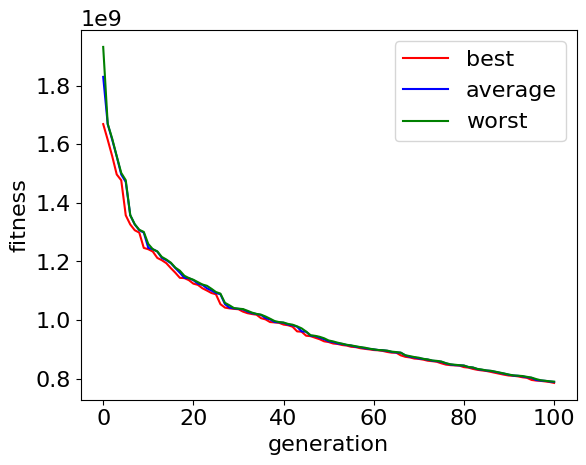

100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123


KeyboardInterrupt: 

In [1]:
'''环境说明
conda version :conda 23.5.0 
python version : python 3.8
注意：mxnet应该是不适用于高版本的python的，minpy是基于mxnet的，我写了一篇博文，里面有安装不成功可能出现的各种问题。
详见：https://blog.csdn.net/2201_75331778/article/details/136748840
JupterLab
2024/3/15
'''

from PIL import Image,ImageDraw
import numpy as np
import random as r
import os
import matplotlib.pyplot as plt
import minpy.numpy as mmp

'''
    首先第一步因为要随机初始化三角形，要先对三角形进行定义
    三角形包括了颜色（RGB），透明度（alpha）,还有三个点的坐标
    （x_1,y_1),(x_2,y_2),(x_3,y_3)
    一个三角形有10维的属性值.
    对于颜色以及属性，可以对color类进行继承
'''

class Color:
    def __init__(self):
        self.r = r.randint(0, 255)
        self.g = r.randint(0, 255)
        self.b = r.randint(0, 255)
        self.a = r.randint(95, 115)
        
class triangle:
    max_mutate_rate = 0.08
    mid_mutate_rate = 0.3
    min_mutate_rate = 0.8
    def __init__(self,x=256,y=256): 
        self.img_triangle=None
        '''设置图片空间大小的默认参数256*256'''
        self.color=Color()
        '''继承Color类'''
        self.ax=r.randint(0,x)
        self.bx=r.randint(0,x)
        self.cx=r.randint(0,x)
        self.ay=r.randint(0,y)
        self.by=r.randint(0,y)
        self.cy=r.randint(0,y)
        
    def create_triangle(self,size=(256,256)):
        self.img_triangle=Image.new('RGBA',size)
        sketchpad=ImageDraw.Draw(self.img_triangle)
        pts = [(self.ax, self.ay), (self.bx, self.by), (self.cx, self.cy)]  # 点坐标
        color = (self.color.r, self.color.g, self.color.b, self.color.a)
        sketchpad.polygon(pts,fill=color)#把坐标和颜色传进去
        return self.img_triangle
    def mutation_triangle(self, m_triangle):
        # 变异实际上是坐标点进行变化
        # 随机生成小数与变异率比较判断该坐标是否变异
        if mutate_or_not(self.max_mutate_rate):
            self.ax = r.randint(0, 255)
            self.ay = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.ax = min(max(0, m_triangle.ax + r.randint(-15, 15)), 255)
            self.ay = min(max(0, m_triangle.ay + r.randint(-15, 15)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.ax = min(max(0, m_triangle.ax + r.randint(-3, 3)), 255)
            self.ay = min(max(0, m_triangle.ay + r.randint(-3, 3)), 255)

        if mutate_or_not(self.max_mutate_rate):
            self.bx = r.randint(0, 255)
            self.by = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.bx = min(max(0, m_triangle.bx + r.randint(-15, 15)), 255)
            self.by = min(max(0, m_triangle.by + r.randint(-15, 15)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.bx = min(max(0, m_triangle.bx + r.randint(-3, 3)), 255)
            self.by = min(max(0, m_triangle.by + r.randint(-3, 3)), 255)

        if mutate_or_not(self.max_mutate_rate):
            self.cx = r.randint(0, 255)
            self.cy = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.cx = min(max(0, m_triangle.cx + r.randint(-15, 15)), 255)
            self.cy = min(max(0, m_triangle.cy + r.randint(-15, 15)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.cx = min(max(0, m_triangle.cx + r.randint(-3, 3)), 255)
            self.cy = min(max(0, m_triangle.cy + r.randint(-3, 3)), 255)
        # color
        if mutate_or_not(self.max_mutate_rate):
            self.color.r = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.color.r = min(max(0, m_triangle.color.r + r.randint(-30, 30)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.color.r = min(max(0, m_triangle.color.r + r.randint(-10, 10)), 255)

        if mutate_or_not(self.max_mutate_rate):
            self.color.g = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.color.g = min(max(0, m_triangle.color.g + r.randint(-30, 30)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.color.g = min(max(0, m_triangle.color.g + r.randint(-10, 10)), 255)

        if mutate_or_not(self.max_mutate_rate):
            self.color.b = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.color.b = min(max(0, m_triangle.color.b + r.randint(-30, 30)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.color.b = min(max(0, m_triangle.color.b + r.randint(-10, 10)), 255)
        # alpha
        if mutate_or_not(self.mid_mutate_rate):
            self.color.a = r.randint(95, 115)
        if mutate_or_not(self.mid_mutate_rate):
            self.color.a = min(max(0, m_triangle.color.a + r.randint(-30, 30)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.color.a = min(max(0, m_triangle.color.a + r.randint(-10, 10)), 255)
def mutate_or_not(rate):
    '''
    生成随机数，判断是否需要变异
    '''
    return True if rate > r.uniform(0, 1) else False


def crossover_or_not(rate):
    """
    生成随机数，判断是否需要交换
    """
    return True if rate > r.uniform(0, 1) else False
class draw_triangles:
    '''一个个体里面有256个三角形（染色体），总共一个种群是有20个个体
    要能够画出来,那么要先进行生成三角形。
    '''
    mutate_rate = 0.01
    
    def __init__(self):
        self.triangles_list=[]
        '''生成一个列表来存储每个三角形的信息'''
        self.fitness = 0
        self.triangles_Img=None
        self.tri_array=None
        '''这个是用来存储最后combine之后生成的image的信息的'''

    def triangle_generate(self,num=256):
        for i in range(num):
            triangle_single=triangle()
            '''调用triangle类，生成单个三角形'''
            self.triangles_list.append(triangle_single)

            '''存到列表里面去'''
    def Imgcombine(self,size=(256,256)):
        '''把所有生成的三角形都整合到一张图片上面来'''
        self.triangles_Img=Image.new('RGBA',size)
        draw=ImageDraw.Draw(self.triangles_Img)
        #draw.rectangle([0,0,256,256],fill=(255,255,255,255))#RGBA
        draw.polygon([(0, 0), (0, 255), (255, 255), (255, 0)], fill=(255, 255, 255, 255))
        '''
        这里用了rectangle函数,画出一个纯白色背景的画板。详细请看官方文档
        https://pillow-docs-cn.readthedocs.io/zh-cn/latest/reference/ImageDraw.html?highlight=imagedraw
        '''
        for triangle_s in self.triangles_list:
            self.triangles_Img = Image.alpha_composite(self.triangles_Img, triangle_s.img_triangle or triangle_s.create_triangle())
        '''这里的triangle就是每一个存在列表里的三角形实例,读取它的img属性，加到大图像中去'''
    
        #为了防止后续处理更麻烦，还是把变异交叉后的对图像的处理工作也放在这里了
        #原先我是单独写了一个类，后面觉得还是这样方便

    def mutation(self,parent):
        '''关于变异的概率这里做了一个改进，看之前那个代码是并没有实际上的对变异概率随代数增加而减少，开始的时候变异概率很低，所以
            迭代要几千代至一万代左右，前期把变异概率设置为0.1，而不是0.0几甚至更低，考虑到大概在第300代的时候其实就已经能够收敛的
            比较好了，所以我打算在指数函数里面选择。
            '''
        for triangle_s in parent.triangles_list:
            if mutate_or_not(self.mutate_rate):
                a = triangle()
                a.mutation_triangle(triangle_s)
                self.triangles_list.append(a)
            else:
                self.triangles_list.append(triangle_s)
    '''均匀交叉'''               
    def uniform_cross(self, parent1, parent2, child):
        nums = len(parent1)
        for i in range(nums):
            if crossover_or_not(0.5):
                self.triangles_list.append(parent1[i])
                child.triangles_list.append(parent2[i])
            else:
                self.triangles_list.append(parent2[i])
                child.triangles_list.append(parent1[i])
    '''计算适应度'''
    def compute_fitness(self, img_array):  # 第二个参数是原图像四个通道矩阵
        self.tri_array = mmp.array(self.triangles_Img)  # 先将PIL图片对象转换成numpy数组,便于计算
        for i in range(3):  # 计算生成的图像RGB通道与目标图像RGB通道的离差平方和
            self.fitness += mmp.sum(mmp.square(self.tri_array[:, :, i] - img_array[:, :, i]))[0]
    def saveImg(self, Path, i):  # 第2，3个参数分别是保存图像的路径，以及迭代次数
        self.triangles_Img.save(os.path.join(Path, "%d.png" % (i)))

class GA:
    '''
    包含了
    '''
    def __init__(self, size, imgPath, savePath, TriangleNums, epochs):
        self.size = size
        self.img_triangle = Image.open(imgPath).resize(self.size).convert('RGBA')  # 读取原图 得到PIL.Image.Image
        self.img_array = mmp.array(self.img_triangle)
        self.TriangleNums = TriangleNums  # 一张图片中三角形个数
        self.savePath = savePath  # 保存拟合图片的路径
        self.epochs = epochs  # 迭代单位次数
    def Cross(self, parents):
        '''交叉操作是在个体之间进行的，比如说一个群体现在有20个个体，就是有20张img了，那交叉
        是在img之间进行的，这里的draw_triangles类就是代表一个个体，然后再从个体之间，有好多
        三角形是他们的基因，选取其中的三角形在个体之间随机交换，每次产生下一代的时候都是随机选择两个个体来
        '''
        l = 0
        childList = []
        for i in range(0, 20):  # 交叉
            j, k = r.sample(range(20), 2)
            '''从20个个体里面随机抽取两个出来，当作parent'''
            childList.append(draw_triangles())
            childList.append(draw_triangles())
            # 均匀交叉
            childList[l].uniform_cross(parents[k].triangles_list, parents[j].triangles_list, childList[l + 1])
            childList[l].Imgcombine()
            childList[l + 1].Imgcombine()
            childList[l].compute_fitness(self.img_array)
            childList[l + 1].compute_fitness(self.img_array)
            l += 2
        return childList
    def Mutation(self,parent):
        """
        整个变异流程：
        """
        childList = []
        for i in range(20):
            childList.append(draw_triangles())
            childList[i].mutation(parent)
            childList[i].Imgcombine()
            childList[i].compute_fitness(self.img_array)
        return childList
#锦标赛法选择
    #def Tournament_selection(self, parents):      
        #childList = []
        #nums = len(parents)
        # 进行锦标赛选择 有放回抽样
        #while len(childList) <= 20:
            #i, j = r.sample(range(nums), 2)
            #if parents[i].fitness > parents[j].fitness:
                #childList.append(parents[j])
            #else:
                #childList.append(parents[i])
        #return childList   
    
    #轮盘赌
    #def Roulette_Wheel_Selection(self,parents):
        #select_prob=[]
        #chlidList=[]
        #nums=len(parents)
        #'''
            #得到父代所有个体的适应度之后，累加起来，得到一个总适应度
        #'''
        #sum_fitness=0
        #for i in range(nums):
            #sum_fitness+=parents[i].fitness
        #'''计算每个个体的选择概率'''
        #for i in range(nums):
            #if i:
                #select_prob.append(select_prob[-1]+parents[i].fitness/sum_fitness)
            #else:
                #select_prob.append(parents[i].fitness/sum_fitness)
        #childList=[]
        #while len(childList)<=20:
            #rs=r.random()
            #for i,sp in enumerate(select_prob):
                #if rs<=sp:
                    #childList.append(parents[i])
        #'''加一个排序,方便后续处理'''
        #childList.sort(key=lambda x: x.fitness, reverse=False)
        #return childList

    def sort_selection(self, parents):
        '''
        确定性选择
        '''
        parents.sort(key=lambda x: x.fitness, reverse=False)
        return parents[:20]
    # 绘制收敛曲线
    def Draw_convergence_curve(self, generation, generation_counts, fitness_3):
        # 每隔epochs代保存一次图片，输出适应度值，并绘制一次收敛曲线
        if generation_counts % self.epochs == 0:
            print(
                '{} Best Fitness rate: {}\n Average Fitness rate :{}\n worst Fitness rate:{}'.format(generation_counts,
                                                                                                     fitness_3[0][
                                                                                                         generation_counts],
                                                                                                     fitness_3[1][
                                                                                                         generation_counts],
                                                                                                     fitness_3[2][
                                                                                                         generation_counts]))
            if generation_counts % 1000 == 0:
                n = generation_counts - 980  # 让部分区域图像更清晰
                plt.rc('font', size=16)
                plt.plot(generation[n:], fitness_3[0][n:], 'r', label='best')  # 最好的个体的适应度
                plt.plot(generation[n:], fitness_3[1][n:], 'b', label='average')  # 中等的个体的适应度
                plt.plot(generation[n:], fitness_3[2][n:], 'g', label='worst')  # 最差的个体的适应度
                plt.xlabel(xlabel='generation')
                plt.ylabel(ylabel='fitness')
                plt.legend()
                plt.show()

            plt.rc('font', size=16)
            plt.plot(generation, fitness_3[0], 'r', label='best')  # 最好的个体的适应度
            plt.plot(generation, fitness_3[1], 'b', label='average')  # 中等的个体的适应度
            plt.plot(generation, fitness_3[2], 'g', label='worst')  # 最差的个体的适应度
            plt.xlabel(xlabel='generation')
            plt.ylabel(ylabel='fitness')
            plt.legend()
            plt.show()
    def model_fit(self):
        """
        遗传算法模型流程：
        首先生成初代个体
        选择最优初代个体作为双亲parent
        进入selection循环:
            交叉->变异->选择
            每epochs绘制收敛曲线
            满足终止条件退出循环
        """

        generation = []  # 种群代数，初始是第0代
        parents = []
        fitness_3 = [[], [], []]  # 每一代中最差，中等，最好的个体的适应度
        childList = []
        # 生成初代个体,随机产生40个个体
        for i in range(40):
            parents.append(draw_triangles())  # 将Image_对象实例加入到种群列表中国
            parents[i].triangle_generate(TriangleNums)  # 第i个个体生成TriangleNums个三角形
            parents[i].Imgcombine()
            parents[i].compute_fitness(self.img_array)  # 将第i个个体 随机生成的多个三角形合成一个图像

        # 开始迭代
        for generation_counts in range(0, 30000):  # generation_counts迭代次数 初始为0
            '''确定选择的方法'''
            parents = self.sort_selection(parents)
            for i, j in [[0, 0], [1, 9], [2, 19]]:
                fitness_3[i].append(parents[j].fitness)
            parents_best = parents[0]
            parents_worst = parents[19]
            parents_avg = parents[9]
            
            '''用轮盘赌
            parents = self.Roulette_Wheel_Selection(parents)
            for i, j in [[0, 0], [1, 9], [2, 19]]:
                fitness_3[i].append(parents[j].fitness)
            parents_best = parents[0]
            parents_worst = parents[19]
            parents_avg = parents[9]
            '''
            
            generation.append(generation_counts)  # 种群迭代次数
            # 绘制收敛曲线
            self.Draw_convergence_curve(generation, generation_counts, fitness_3)
            # 新生成的个体所组成的种群列表
            childList_crossover = self.Cross(parents)  # 交叉
            childList_mutation = self.Mutation(parents_best)  # 最优个体变异
            parents.extend(childList_crossover)
            parents.extend(childList_mutation)
            del childList_mutation
            del childList_crossover
            if generation_counts % self.epochs == 0:
                parents_best.saveImg(self.savePath + str('\\best'), generation_counts)
                parents_worst.saveImg(self.savePath + str('\\worst'), generation_counts)
            print(generation_counts)
'''global'''
# 原图路径
imgPath = r"火狐.png"
# 图片保存路径
SavePath = r".\img"
# 迭代单位次数
epochs = 100
# 一个个体中三角形个数 256
TriangleNums = 256
# 图片通道矩阵大小
size = (256, 256)

if __name__ == '__main__':
    GA_Img = GA(size, imgPath, SavePath, TriangleNums, epochs)
    print('开始进行遗传算法')
    GA_Img.model_fit()